<a href="https://colab.research.google.com/github/Alisha210302/NLP/blob/main/25_Sequential_Modelling_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is multiclass classification problem

In [ ]:
alphabets = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
# to create the dictionary
list(enumerate(alphabets))

[(0, 'A'),
 (1, 'B'),
 (2, 'C'),
 (3, 'D'),
 (4, 'E'),
 (5, 'F'),
 (6, 'G'),
 (7, 'H'),
 (8, 'I'),
 (9, 'J'),
 (10, 'K'),
 (11, 'L'),
 (12, 'M'),
 (13, 'N'),
 (14, 'O'),
 (15, 'P'),
 (16, 'Q'),
 (17, 'R'),
 (18, 'S'),
 (19, 'T'),
 (20, 'U'),
 (21, 'V'),
 (22, 'W'),
 (23, 'X'),
 (24, 'Y'),
 (25, 'Z')]

In [ ]:
int_to_char = dict(enumerate(alphabets))
int_to_char

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
int_to_char[6]

'G'

In [ ]:
char_to_int = dict((v,i) for i,v in enumerate(alphabets))
char_to_int

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
char_to_int['A']

0

In [ ]:
seq_length = 1
x = []
y = []

for i in range(len(alphabets)-seq_length):
  seq_in = [alphabets[i]]
  seq_out = alphabets[i+1]
  print(seq_in,'-->',seq_out)
  x +=[[char_to_int[seq_in[0]]]]
  y +=[char_to_int[seq_out]]
  # x.append(char_to_int[seq_in[0]])
  # y.append(char_to_int[seq_out])


['A'] --> B
['B'] --> C
['C'] --> D
['D'] --> E
['E'] --> F
['F'] --> G
['G'] --> H
['H'] --> I
['I'] --> J
['J'] --> K
['K'] --> L
['L'] --> M
['M'] --> N
['N'] --> O
['O'] --> P
['P'] --> Q
['Q'] --> R
['R'] --> S
['S'] --> T
['T'] --> U
['U'] --> V
['V'] --> W
['W'] --> X
['X'] --> Y
['Y'] --> Z


In [ ]:
x

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24]]

In [ ]:
y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

### Prepare the input data

In [ ]:
import numpy as np

In [ ]:
x = np.reshape(x ,(25,1,1))

In [ ]:
x

array([[[ 0]],

       [[ 1]],

       [[ 2]],

       [[ 3]],

       [[ 4]],

       [[ 5]],

       [[ 6]],

       [[ 7]],

       [[ 8]],

       [[ 9]],

       [[10]],

       [[11]],

       [[12]],

       [[13]],

       [[14]],

       [[15]],

       [[16]],

       [[17]],

       [[18]],

       [[19]],

       [[20]],

       [[21]],

       [[22]],

       [[23]],

       [[24]]])

In [ ]:
x.shape

(25, 1, 1)

In [ ]:
# normalize the data
x = x/25
x

array([[[0.  ]],

       [[0.04]],

       [[0.08]],

       [[0.12]],

       [[0.16]],

       [[0.2 ]],

       [[0.24]],

       [[0.28]],

       [[0.32]],

       [[0.36]],

       [[0.4 ]],

       [[0.44]],

       [[0.48]],

       [[0.52]],

       [[0.56]],

       [[0.6 ]],

       [[0.64]],

       [[0.68]],

       [[0.72]],

       [[0.76]],

       [[0.8 ]],

       [[0.84]],

       [[0.88]],

       [[0.92]],

       [[0.96]]])

### Prepare the output data

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_new = to_categorical(y)

In [ ]:
y_new.shape

(25, 26)

In [ ]:
y_new

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

### Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Input

In [ ]:
model = Sequential()
model.add(Input((1,1)))
model.add(Dense(25, activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.utils import plot_model

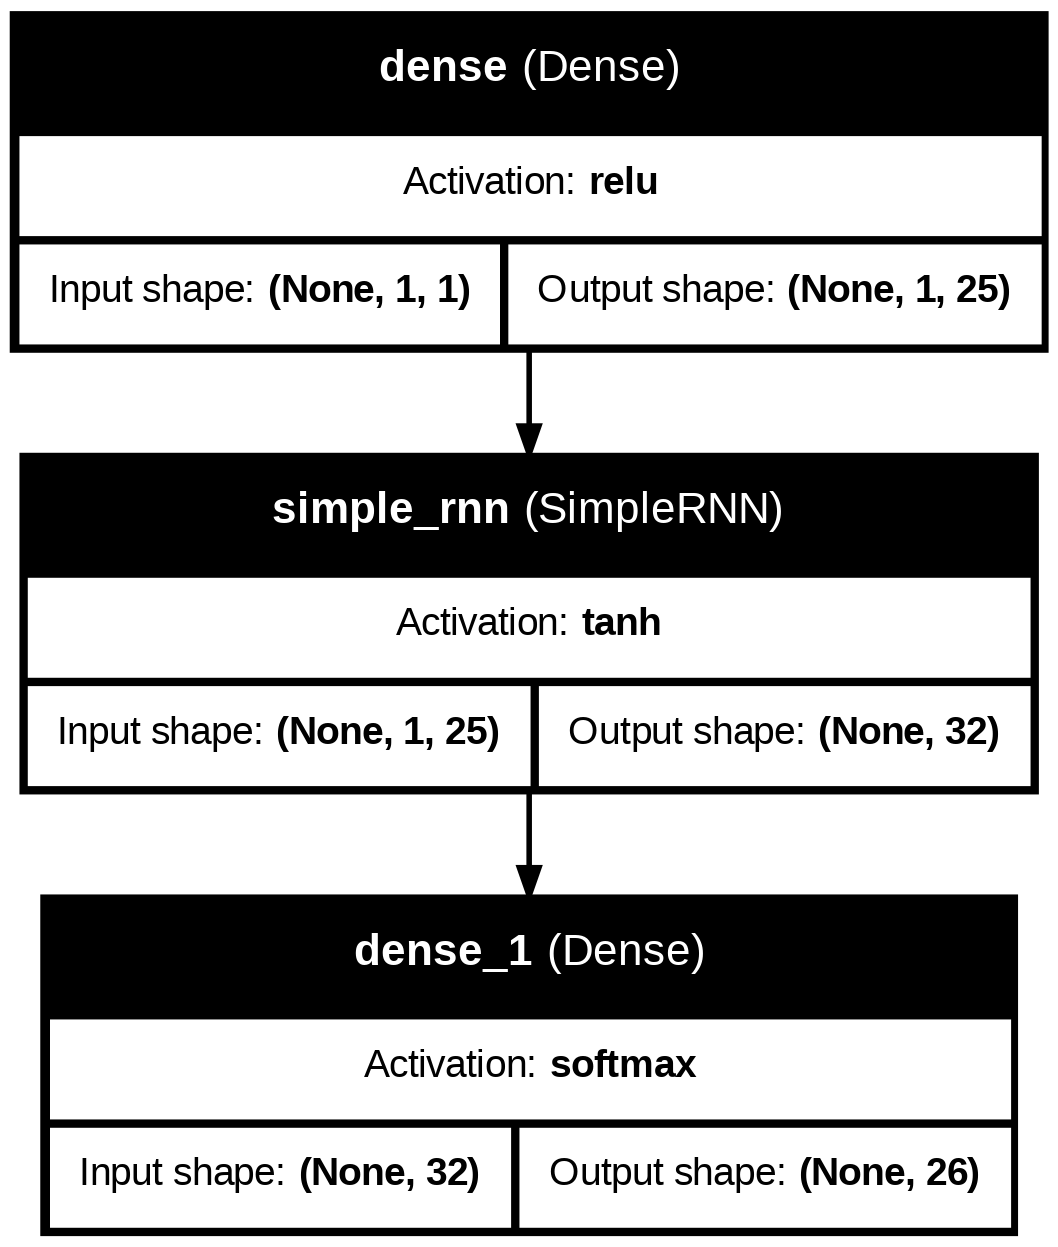

In [ ]:
plot_model(model,show_layer_activations=True,show_layer_names=True,show_shapes=True)

### Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [ ]:
model.fit(x,y_new,epochs=1000,batch_size=1)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0357 - loss: 3.2892
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0160 - loss: 3.2779    
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0541 - loss: 3.2575
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0031 - loss: 3.2658    
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0682 - loss: 3.1939
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0207 - loss: 3.2055    
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0322 - loss: 3.2296
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0906 - loss: 3.1712
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0031 - loss: 3.1817    
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0395 - loss: 3.1587
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0889 - loss: 3.1083
Epoch 12/1000
25/25 ━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(x,y_new,batch_size=1)

### Prediction

In [ ]:
new = 'P'
x_new = char_to_int[new]
x_new

In [ ]:
x_new = np.reshape(x_new,(1,1,1))
x_new

In [ ]:
x_new = x_new/25
x_new

In [ ]:
y_pred = model.predict(x_new)
y_pred

In [ ]:
int_to_char[np.argmax(y_pred)]

### Increasing sequence length

In [ ]:
seq_length = 3
x = []
y = []

for i in range(len(alphabets) - seq_length):
  seq_in = alphabets[i:i+seq_length]
  seq_out = alphabets[i+seq_length]
  x.append([char_to_int[char] for char in seq_in])
  y.append(char_to_int[seq_out])
  print(seq_in, '-->',seq_out)


In [ ]:
x

In [ ]:
y

### Prepare the input data

In [ ]:
x_new = np.reshape(x,(23,seq_length,1))
x_new

In [ ]:
x_new.shape

In [ ]:
y_new = to_categorical(y)
y_new.shape

In [ ]:
x_new = x_new/25
x_new

### Build the model

In [ ]:
model = Sequential()
model.add(Input((3,1)))
model.add(Dense(25,activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_new,y_new,epochs=1000,batch_size=1)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2691
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0316 - loss: 3.2479     
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0055 - loss: 3.2611    
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0118 - loss: 3.2410
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0281 - loss: 3.1851     
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0494 - loss: 3.2092
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.1694
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.1210 
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.1079 
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.0967 
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.0561
Epoch 12/10

In [ ]:
model.evaluate(x_new,y_new,batch_size=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1637  


[0.12148995697498322, 1.0]

### Predict

In [ ]:
new = 'PQR'
x_new = [char_to_int[char] for char in new]
x_new

[15, 16, 17]

In [ ]:
x_new = np.reshape(x_new,(1,3,1))
x_new

array([[[15],
        [16],
        [17]]])

In [ ]:
x_new = x_new/25
x_new

array([[[0.6 ],
        [0.64],
        [0.68]]])

In [ ]:
y_pred = model.predict(x_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.4772102e-10, 1.7923222e-11, 3.6983368e-11, 6.5850453e-10,
        1.1807874e-09, 1.1490374e-07, 2.3475641e-07, 2.1394956e-06,
        1.1094540e-06, 6.5126933e-06, 5.6541617e-06, 5.1468423e-06,
        1.3749477e-05, 1.5830758e-05, 1.9992878e-05, 1.4016779e-04,
        4.7954914e-04, 5.4015513e-03, 9.8276168e-01, 1.0095503e-02,
        7.5810053e-04, 1.4341489e-04, 1.1477786e-04, 2.7255712e-05,
        6.8300428e-06, 7.6355207e-07]], dtype=float32)

In [ ]:
int_to_char[np.argmax(y_pred)]

'S'